# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

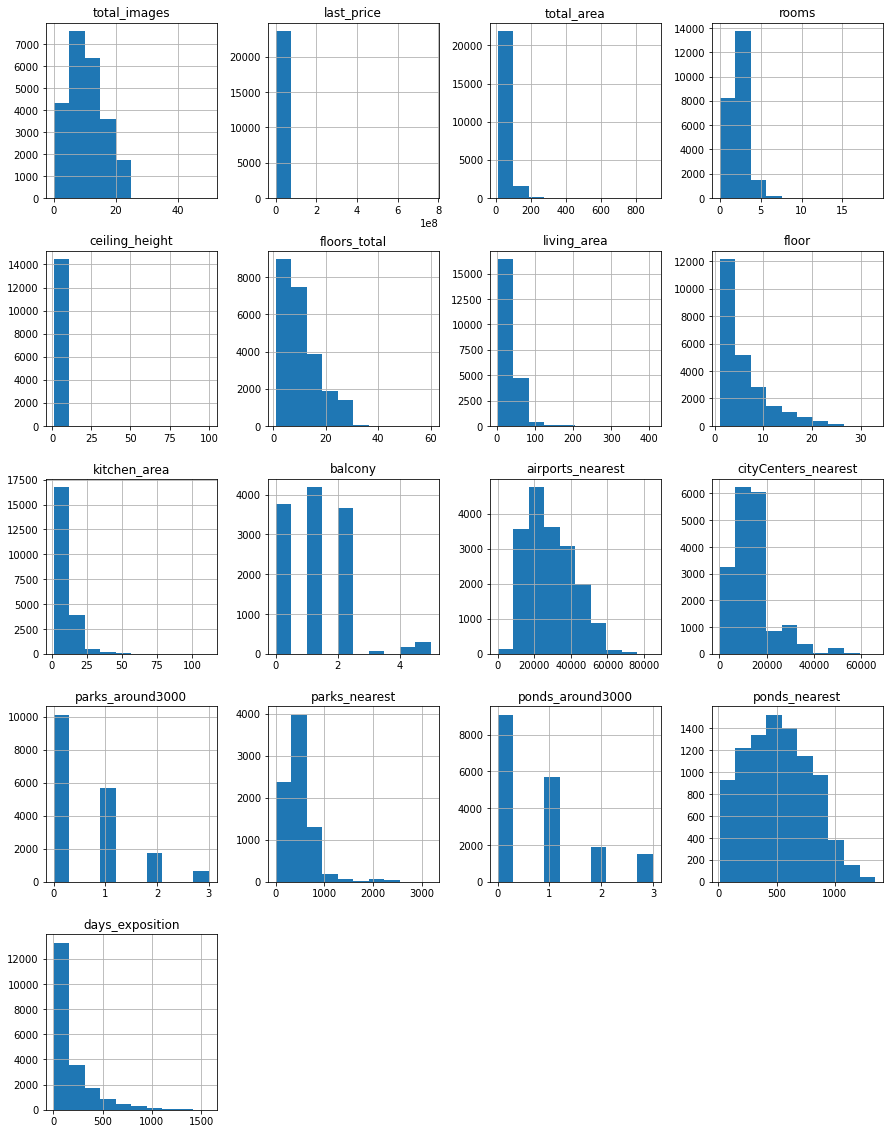

In [2]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 20))

### Предобработка данных

Приведём в порядок названия столбцов:

In [3]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', \
                   'ponds_around3000': 'ponds_around_3000'}, inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`, `days_exposition` есть пропуски. Необходимо посчитать их процент, попытаться определить природу происхождения и по возможности заполнить или удалить.

In [4]:
df.isna().mean().sort_values()

total_images            0.000000
open_plan               0.000000
floor                   0.000000
rooms                   0.000000
studio                  0.000000
total_area              0.000000
last_price              0.000000
first_day_exposition    0.000000
locality_name           0.002068
floors_total            0.003629
living_area             0.080299
kitchen_area            0.096122
days_exposition         0.134225
ponds_around_3000       0.232837
parks_around_3000       0.232837
city_centers_nearest    0.232879
airports_nearest        0.233850
ceiling_height          0.387991
balcony                 0.486054
ponds_nearest           0.615596
parks_nearest           0.659100
is_apartment            0.882906
dtype: float64

Большое количество пропусков и отсутствие булевых нулей в столбце `is_apartment` вероятнее всего означает, что владельцы жилых помещений просто пропускают этот пункт при заполнении. Поэтому можно заполнить пропуски булевым нулём.

Аналогичное предположение можно сделать про столбец `balcony`: пропуски вероятнее всего означают, что владельцы квартир без балкона пропускают этот пункт при заполнении. Поэтому можно заполнить пропуски нулём. Также для оптимизации объёма датафрейма можно перевести значения в формат `integer`.

Пропуски в столбце `ceiling_height`, `living_area`, `kitchen_area` можно заполнить медианным значением, т.к. достоверно восстановить высоту потолков, жилую площадь и площадь кухни по каждой квартире не представляется возможным. Медиана поможет защитить данные от возможных выбросов, искажающих среднее значение. Наличие пропусков можно объяснить предположением об отсутствии у владельцев возможности измерить высоту и площади. Также по `ceiling_height` необходимо отметить, что процент отсутствующих данных высокий, и есть риск искажения итоговой выборки. По `living_area` и `kitchen_area` процент пропусков менее 10%, но риск искажения итоговой выборки также остаётся.

От пропусков в столбцах `locality_name`, `floors_total` можно избавиться удалением, т.к. их количество не превышает 0,5% всех данных и не приведёт к искажению общей картины. Столбец `floors_total` переведём в формат `integer`.

In [5]:
pd.options.mode.chained_assignment = None

df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0).astype('int')

for data in ['ceiling_height', 'living_area', 'kitchen_area']:
    df[data] = df[data].fillna(df[data].median())

df = df.dropna(subset=['locality_name', 'floors_total'])

df['floors_total'] = df['floors_total'].astype('int')

Избавимся от неявных дубликтов в столбце `locality_name`: устраним топонимы, а также заменим "ё" на "е".

Заметим, что в столбцах `airports_nearest`, `city_centers_nearest`, `parks_around_3000`,  `ponds_around_3000` практически идентичный процент пропусков. Это может говорить о том, что владельцы данных квартир не захотели указывать геопозицию, и геосервисы не смогли выдать необходимую информацию. В то же время в столбцах `ponds_nearest` и `parks_nearest` гораздо больше пропусков, но их процент также практически однинаков. Почему сложилась такая картина, на данный момент сказать трудно. Т.к. процент пропусков весьма большой (23-66%), оставим пропуски "as is".
Столбцы `parks_around_3000` и  `ponds_around_3000` невозможно перевести в формат `integer` по причине наличия пропусков.

Устранить данные пропуски можно медианным значением соответствующих значений для населённого пункта, в котором находится недвижимость. Однако, по некоторым населённым пунктам геоданные отсутствуют полностью (например, Бугры), поэтому такой метод сработает не во всех случаях.

---

*В ходе работы было выявлено, что такое заполнение пропусков в геоданных приводит к сильному искажению статистики, поэтому данная функция представлена справочно и закомментирована.*


In [6]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е') \
    .replace(['деревня ', 'городской поселок ', 'коттеджный поселок ', 'поселок ', \
    'городского типа ', 'при железнодорожной станции ', 'садоводческое некоммерческое товарищество ', \
    'садовое товарищество ', 'село ', 'станции '], '', regex=True)
)

#def replace_nan_city_distance():
#    city_names = df['locality_name'].unique()
#    variable_distance = ['airports_nearest', 'city_centers_nearest', 'ponds_nearest', 'parks_nearest', 'parks_around_3000',  'ponds_around_3000']
#    for variable in variable_distance:
#        distance = df.groupby('locality_name')[variable].median()
#        for city in city_names:
#            if (distance.loc[city] > 0):
#                df.loc[df['locality_name'] == city, variable] = \
#               df.loc[df['locality_name'] == city, variable].fillna(distance.loc[city])


#replace_nan_city_distance()

Столбец с датой приведём к стандартному отображению.

Пропуски в столбце `days_exposition` можно объяснить тем, что на дату формирования датафрейма данные объявления ещё не были сняты с публикации. Поэтому можно провести замену разностью максимальной даты размещения (т.е., самой свежей) в датафрейме и датой публикации объявления. После этого переведём столбец в формат `integer`.

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], yearfirst = True)
day_max = df['first_day_exposition'].max()
df['days_exposition'].fillna((day_max - df['first_day_exposition']).dt.days, inplace=True)
df['days_exposition'] = df['days_exposition'].astype('int')

print(df.isna().mean().sort_values())
print()
df.info()

total_images            0.000000
locality_name           0.000000
balcony                 0.000000
kitchen_area            0.000000
open_plan               0.000000
is_apartment            0.000000
floor                   0.000000
studio                  0.000000
floors_total            0.000000
ceiling_height          0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
last_price              0.000000
living_area             0.000000
days_exposition         0.000000
parks_around_3000       0.233397
ponds_around_3000       0.233397
city_centers_nearest    0.233439
airports_nearest        0.234415
ponds_nearest           0.616550
parks_nearest           0.659240
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 

Работа с пропусками закончена.

---


### Посчитаем и добавим в таблицу новые столбцы

Необходимо создать столбцы со следующими параметрами:
* цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [8]:
df['meter_price'] = round(df['last_price'] / df['total_area'], 2)
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['floor_type'] = (
    df[['floor', 'floors_total']]
    .apply(lambda x: 'первый' if x[0] == 1 else ('последний' if x[0] == x[1] else 'другой'), axis=1)
)
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000, 0)
df


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,week_day,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.0,9,False,False,False,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,773,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,9.10,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,446,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,149511.40,1,3,2017,другой,10.0


### Проведём исследовательский анализ данных

#### Работа с аномалиями

Анализ данных начнём с изучения основных параметров датафрейма. Необходимо проверить данные на наличие аномалий и выбросов. Если природа аномалии будет понятна и данные действительно искажены, то восстановим корректное значение. В противном случае удалим редкие и выбивающиеся значения.

Список параметров:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>],
       [<AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

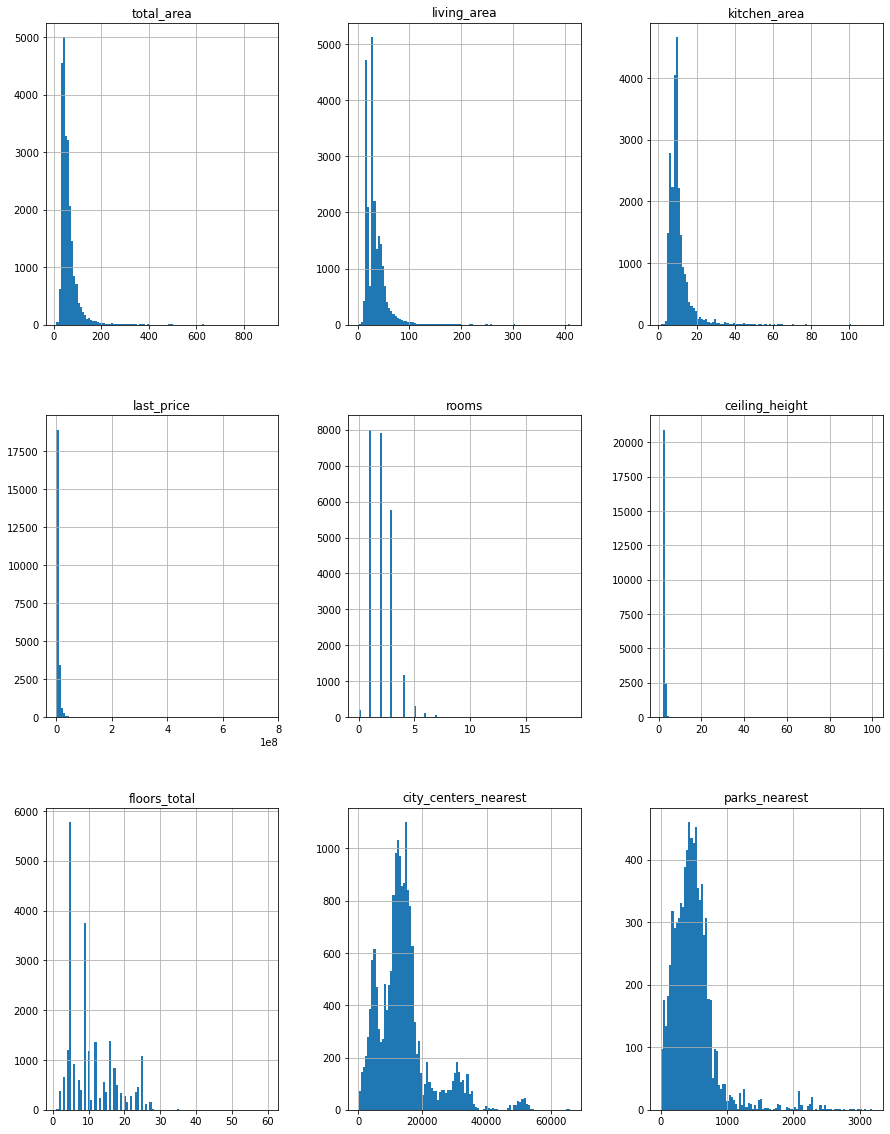

In [9]:
df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'city_centers_nearest', 'parks_nearest']].hist(bins=100, figsize=(15, 20))


Рассмотим каждый график подробнее.

---

Начнём со столбца `last_price`:

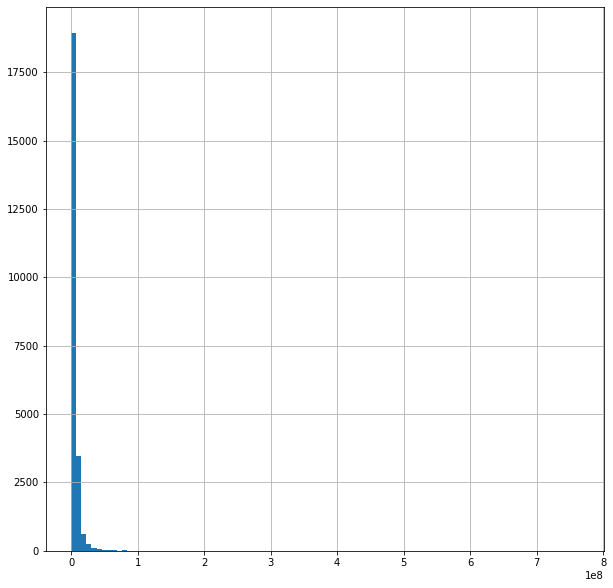

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
130592949.92000109


In [10]:
df['last_price'].hist(bins=100, figsize=(10, 10))
plt.show()
print(df['last_price'].describe())
print(df['last_price'].quantile(0.999))

В данном столбце обнаружено подозрительно мальенькое значение (12.190), скорее всего, цену указали в млн рублей. Умножим это значение на 1000.

В то же время есть квартиры стоимостью свыше 40, 60 и даже 700 млн! Вероятно, это элитное жильё, или квартиры в самом центре города. Эти позиции своими значеними цены очень сильно смещают распределение влево. Поэтому при дальнейшем анализе будем использовать медиану.

Также заметим, что 99% квартир стоят меньше 36 млн рублей, удалим "сверхбогатые данные".

count    2.332600e+04
mean     5.828759e+06
std      4.328296e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.695000e+06
max      3.595350e+07
Name: last_price, dtype: float64


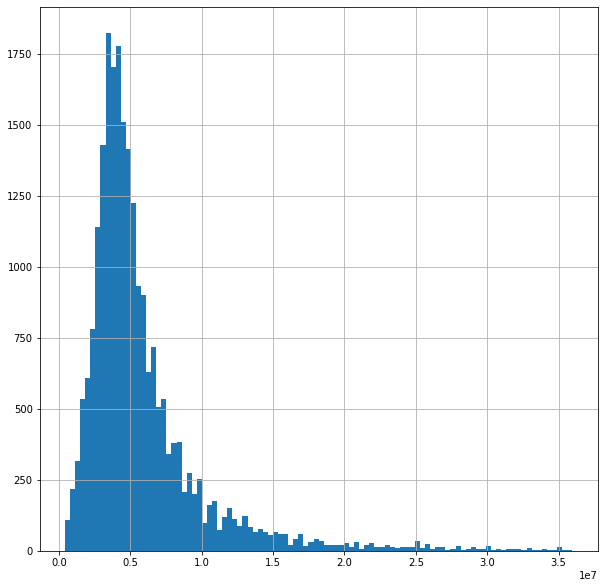

In [11]:
last_price_min = df['last_price'].min()
df['last_price'] = df['last_price'].apply(lambda x: x if x != last_price_min else x * 1000)
df = df.query('last_price < 36000000').copy()
print(df['last_price'].describe())
df['last_price'].hist(bins=100, figsize=(10, 10))
plt.show()

Распределение теперь выглядит гораздо лучше. 

---

Рассмотрим значения столбца `total_area`.

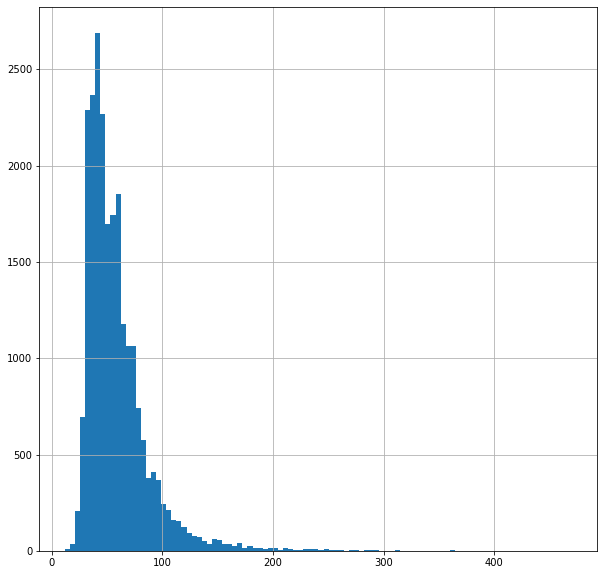

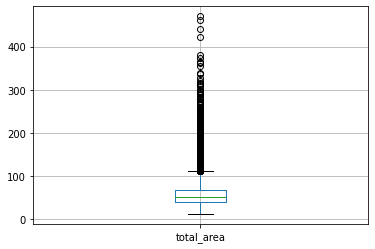

count    23326.000000
mean        58.644286
std         29.404912
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        470.300000
Name: total_area, dtype: float64
170.0


In [12]:
df['total_area'].hist(bins=100, figsize=(10, 10))
plt.show()
df.boxplot(column='total_area')
plt.show()
print(df['total_area'].describe())
print(df['total_area'].quantile(0.99))

В данном столбце также имеются выбросы: квартир больше 170 квадратов всего 1%, но этот 1% сильно смещает распределение влево своей "площадностью". Удалим данные аномалии.

count    23084.000000
mean        56.978876
std         24.000012
min         12.000000
25%         40.000000
50%         51.100000
75%         68.000000
max        169.500000
Name: total_area, dtype: float64


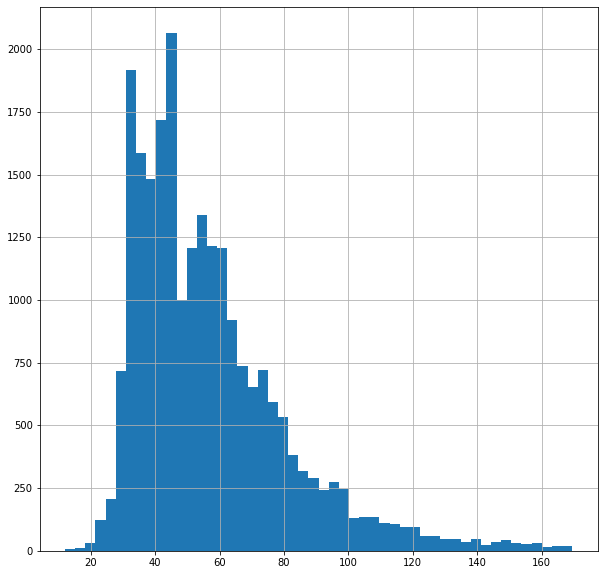

In [13]:
df = df.query('total_area < 170')
print(df['total_area'].describe())
df['total_area'].hist(bins=50, figsize=(10, 10))
plt.show()

Распределение не похоже на стандартное, сохранились выбросы в районе 30-35 м2, 60 и 80 м2. Также наблюдаются провалы на 47 и 70 м2. Объяснить это на данный момент затруднительно. Возможно, это связано с типовыми нормами квадратуры на количество комнат и проживающих.

---

Рассмотрим столбец `ceiling_height`.

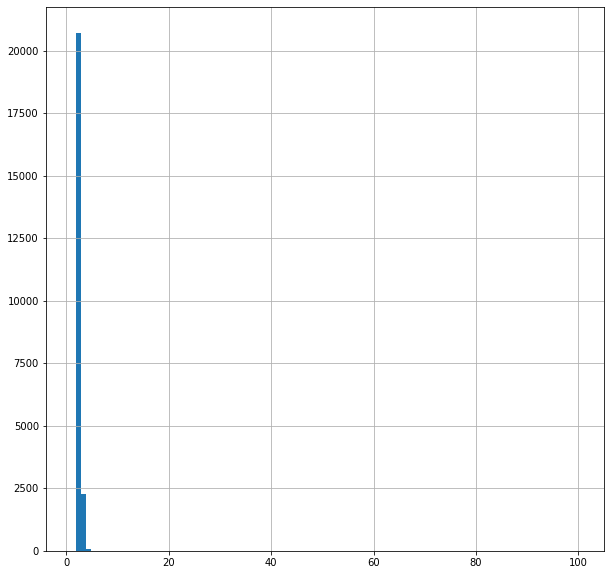

count    23084.000000
mean         2.717216
std          0.997386
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
3.54


In [14]:
df['ceiling_height'].hist(bins=100, figsize=(10, 10))
plt.show()
print(df['ceiling_height'].describe())
print(df['ceiling_height'].quantile(0.99))

По графикам видно аномалии более 25 м: вряд ли у людей такие высокие потолки, скорее всего, был неправильно указан разделитель дробной части. Разделим данные значения на 10.
Также есть высоты, которые не соотвтествуют строительным нормам, - более 4м. Что это может значить? Индивидуальный проект? Возможно, но даже Романовы и Юсуповы в своё время редко таким развлекались. Такие значения можно удалить.

По строительным нормам высота потолков должна составлять не менее 2,5 м. Однако, в нашем распределении есть квартиры с потолками ниже нормы! Почему так? Не для карликов же строилось. Вероятно, где-то закралась ошибка. Удалим минимальные аномалии.

count    22964.000000
mean         2.687910
std          0.193675
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


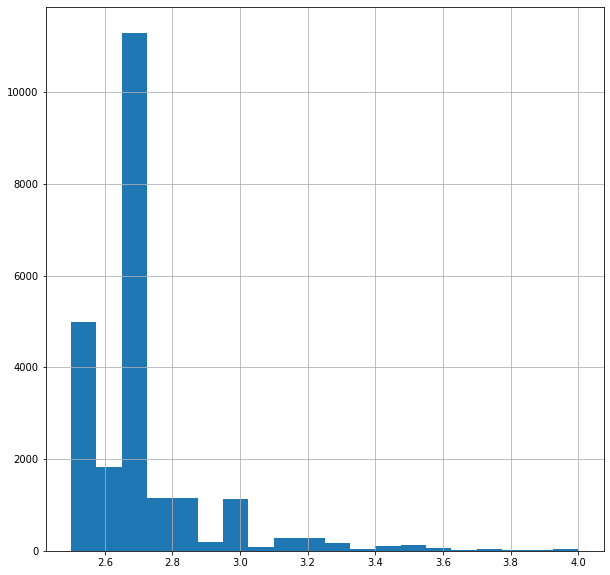

In [15]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x if x <= 25 else x / 10)
df = df.query('ceiling_height <= 4 and ceiling_height >= 2.5').copy()
print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=20, figsize=(10, 10))
plt.show()


В получившихся данных на гистограмме также имеется несколько выбросов. Скорее всего, это связано с типовыми высотами потолков по строительным нормам. Также можно сделать предположение о некорректных замерах высоты, округлениях.

---

Рассмотрим столбцы `living_area` и `kitchen_area`. По логике, их распределения должны коррелировать с распределением суммарной площади.

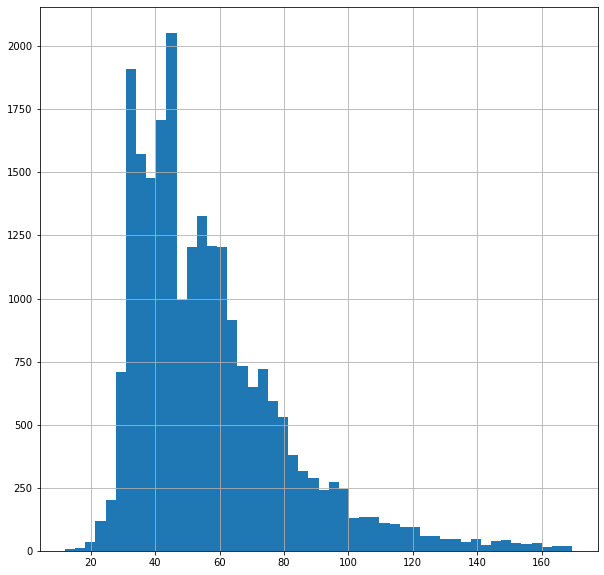

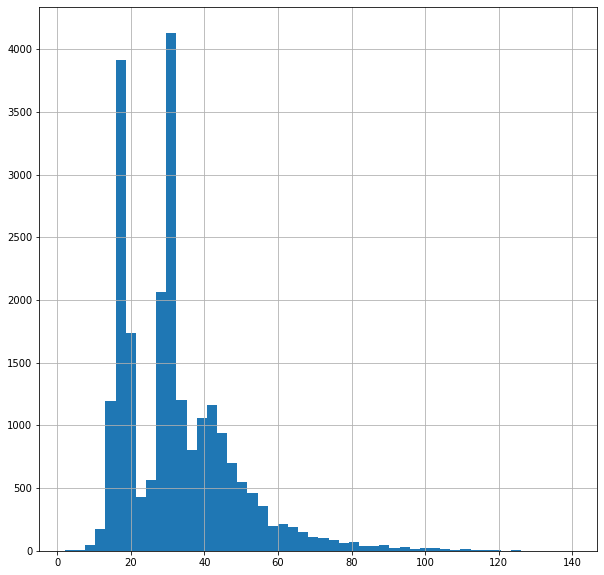

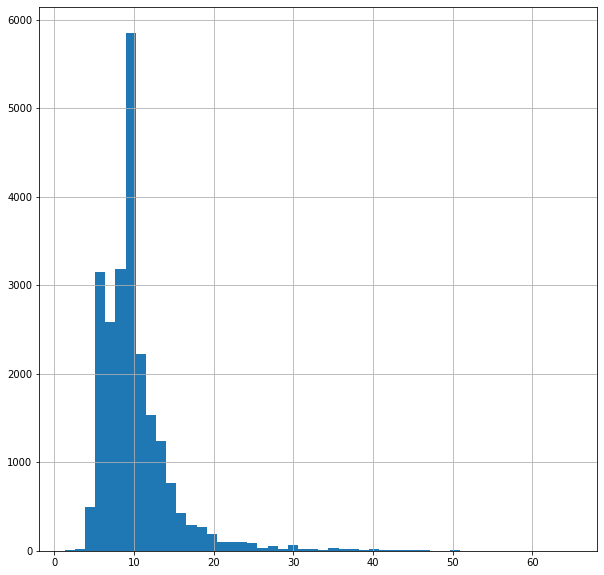

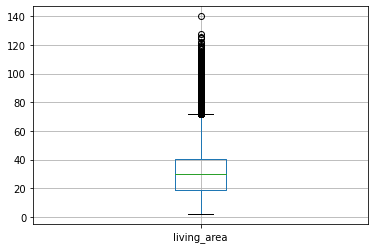

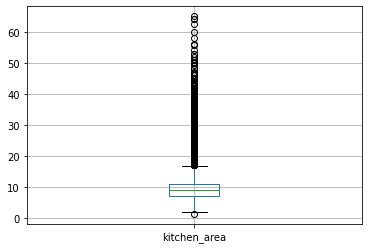

count    22964.000000
mean        32.408659
std         15.467713
min          2.000000
25%         19.000000
50%         30.000000
75%         40.100000
max        140.000000
Name: living_area, dtype: float64
87.0
count    22964.000000
mean        10.120226
std          4.715610
min          1.300000
25%          7.200000
50%          9.100000
75%         11.110000
max         65.000000
Name: kitchen_area, dtype: float64
20.0


In [16]:
df['total_area'].hist(bins=50, figsize=(10, 10))
plt.show()
df['living_area'].hist(bins=50, figsize=(10, 10))
plt.show()
df['kitchen_area'].hist(bins=50, figsize=(10, 10))
plt.show()
df.boxplot(column='living_area')
plt.show()
df.boxplot(column='kitchen_area')
plt.show()
print(df['living_area'].describe())
print(df['living_area'].quantile(0.99))
print(df['kitchen_area'].describe())
print(df['kitchen_area'].quantile(0.965))

По жилой площади наблюдается несколько пиков. Вероятно, они связаны со строительными нормами и типовыми планировками квартир. Также можно заметить корреляцию этих пиков с пиками по суммарной площади. Выбросы присутствуют, но их количество мало. Трогать их не будем.

По площади кухонь наблюдаются выбросы. Скорее всего, площади свыше 20 м2 предполагаются как кухни-гостиные. Тем не менее, эти 3,5% планировок искажают нам распределение. Необходимо их удалить. Также по строительным нормам не допускаются кухни меньше 5 м2. Т.к. такие данные присутствуют, верятно, это некорректная перепланировка или ошибка. Их также нужно удалить. Обратим внимание на наличие двух пиков, которые коррелируют с суммарной площадью и жилой площадью.

count    21983.000000
mean         9.469067
std          2.943979
min          5.000000
25%          7.175000
50%          9.100000
75%         11.000000
max         19.940000
Name: kitchen_area, dtype: float64


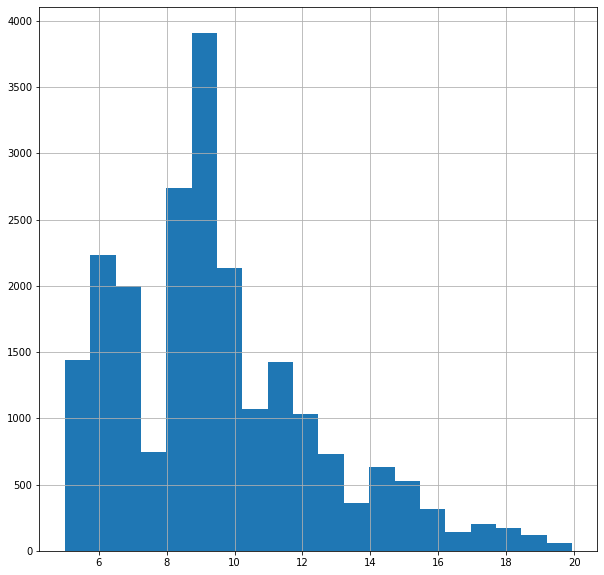

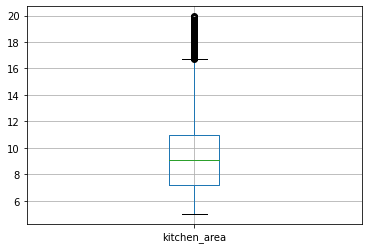

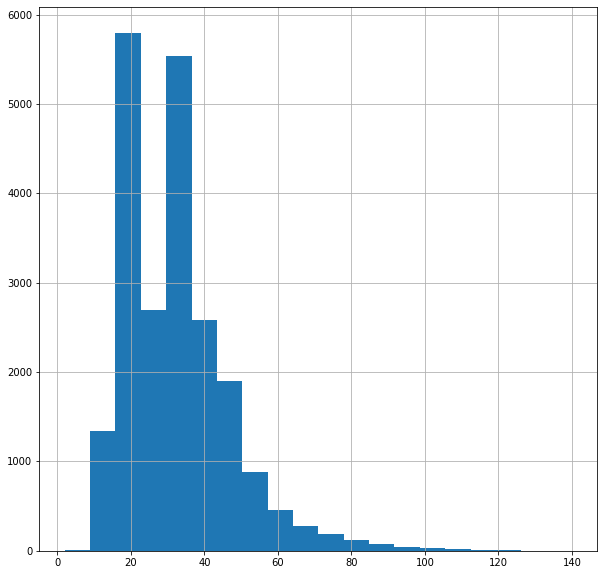

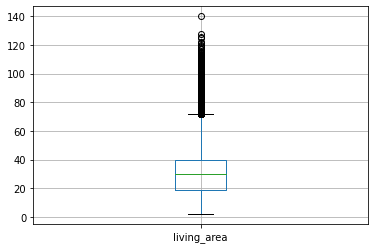

count    21983.000000
mean        31.908642
std         14.852936
min          2.000000
25%         19.000000
50%         30.000000
75%         40.000000
max        140.000000
Name: living_area, dtype: float64


In [17]:
df = df.query('kitchen_area < 20 and kitchen_area >= 5').copy()
print(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=20, figsize=(10, 10))
plt.show()
df.boxplot(column='kitchen_area')
plt.show()
df['living_area'].hist(bins=20, figsize=(10, 10))
plt.show()
df.boxplot(column='living_area')
plt.show()
print(df['living_area'].describe())

Рассмотрим столбец `city_centers_nearest`: по гистограмме наблюдается несколько пиков (5, 12, 18, 22, 31 км). Предположительно, это связано с районированием и застройкой: где-то недалеко от центра может строиться новый жилой комплекс, который может спровоцировать выброс. Выбросы оставим, т.к. это геоданные, человеческий фактор практически исключается.

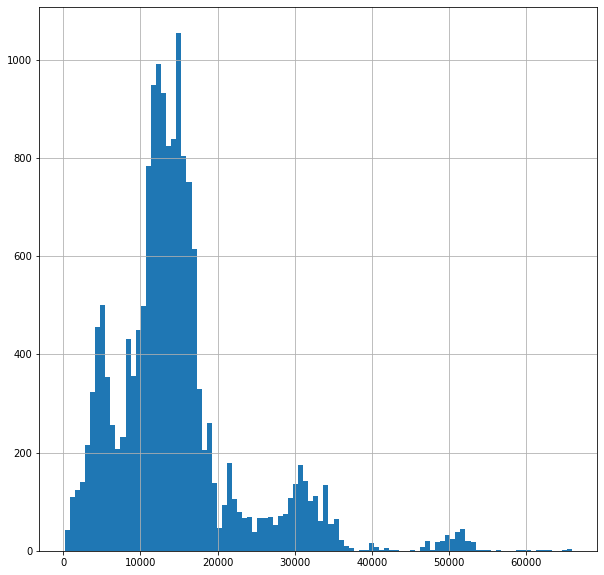

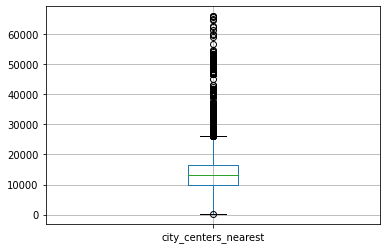

count    16666.000000
mean     14576.364635
std       8535.090359
min        181.000000
25%       9974.250000
50%      13326.000000
75%      16496.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64


In [18]:
df['city_centers_nearest'].hist(bins=100, figsize=(10, 10))
plt.show()
df.boxplot(column='city_centers_nearest')
plt.show()
print(df['city_centers_nearest'].describe())

Рассмотрим столбец `rooms`: распределение выглядит корректно.

Заметим, что есть объявления с количеством комнат меньше одной: скорее всего, это связано со свободной планировкой в новостройке или частным домом. Или же это апартаменты, где жилая площадь не предусмотрена по закону.

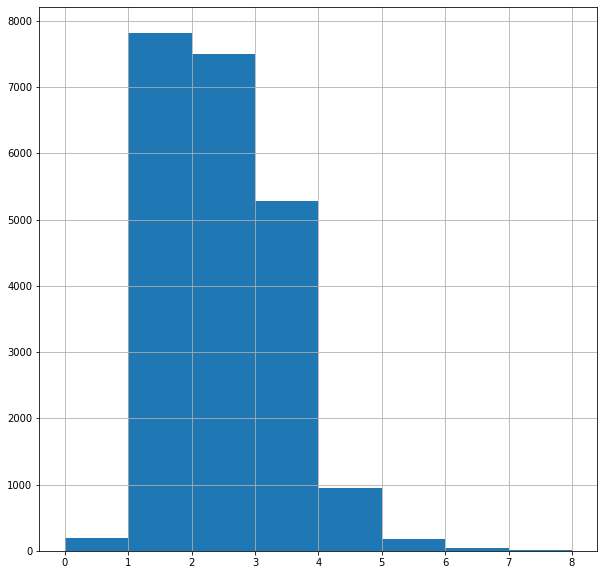

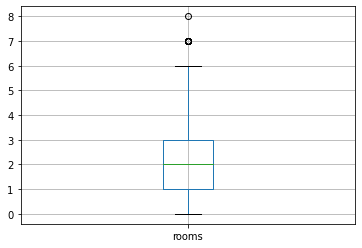

count    21983.000000
mean         1.987763
std          0.957606
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


In [19]:
df['rooms'].hist(bins=8, figsize=(10, 10))
plt.show()
df.boxplot(column='rooms')
plt.show()
print(df['rooms'].describe())

Рассмотрим столбец `parks_nearest`: наблюдается очень большой пик около 500м. Однако, распределение выглядит корректным. Вероятно, это связано с количеством парков в городе и равноудалением их от жилья.
Максимальные значения в пределах нормы.

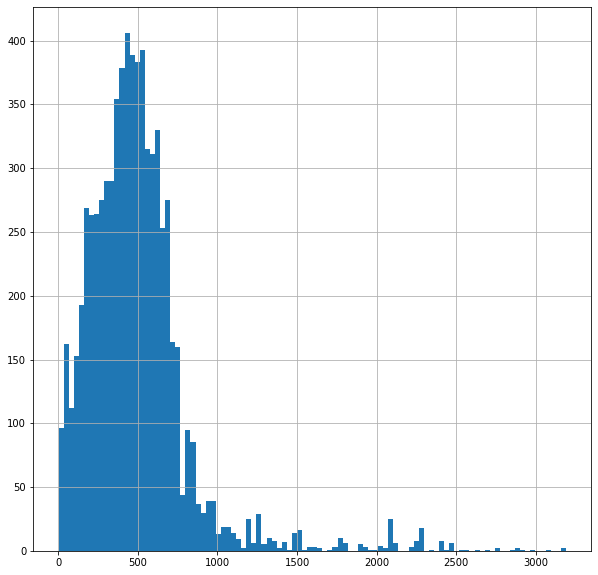

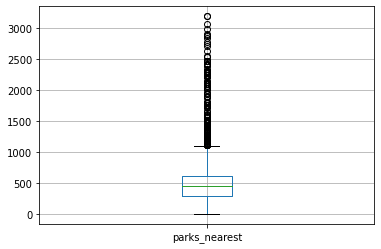

count    7182.000000
mean      492.339321
std       338.768048
min         1.000000
25%       289.000000
50%       456.000000
75%       614.750000
max      3190.000000
Name: parks_nearest, dtype: float64


In [20]:
df['parks_nearest'].hist(bins=100, figsize=(10, 10))
plt.show()
df.boxplot(column='parks_nearest')
plt.show()
print(df['parks_nearest'].describe())

**Работа с аномалиями закончена.**

---

#### Изучение скорости продаж квартир

Выведем статистические показатели и гистограмму:

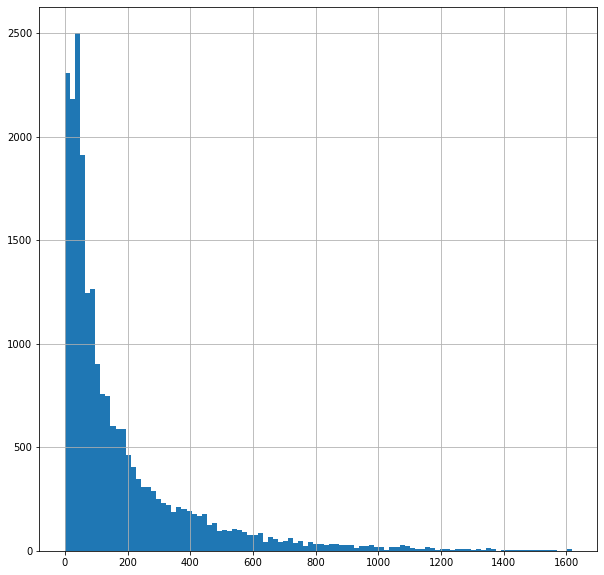

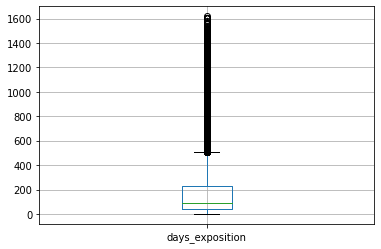

count    21983.000000
mean       179.729109
std        225.755447
min          0.000000
25%         42.000000
50%         91.000000
75%        228.000000
max       1618.000000
Name: days_exposition, dtype: float64


In [21]:
df['days_exposition'].hist(bins=100, figsize=(10, 10))
plt.show()
df.boxplot(column='days_exposition')
plt.show()
print(df['days_exposition'].describe())

По графику видно, что много продаж квартир совершается чуть ли не в день размещения объявления! Почему так быстро? Причин может быть несколько: повышенный спрос на недвижимость, низкая стоимость, удобное расположение и т.д. 

В то же время есть позиции, которые висят *годами* в ожидании сделки. Тут тоже возникают вопросы о ликвидности такого жилья и факторах непопулярности. Данные объявления сильно влияют на среднее время продажи. Поэтому лучше оринетироваться на медиану.



Рассмотрим статистику по первым 200 дням:

<AxesSubplot:>

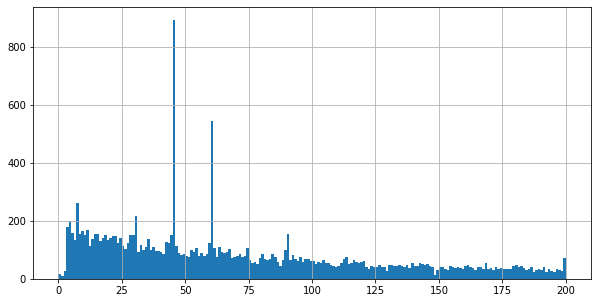

In [22]:
df['days_exposition'].hist(bins=200, range=(0, 200), figsize=(10, 5))

Можно заметить, что чаще всего квартиры продают за 40-60 дней. Вполне реальные цифры.

#### Анализ влияния различных факторов на цену

С помощью наших фильтрованных данных изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Посчитаем коэффициент корреляции Пирсона и построим графики:

Коэффициенты корреляции Пирсона (цены от):
total_area
0.75


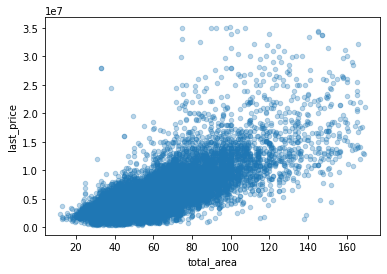

living_area
0.61


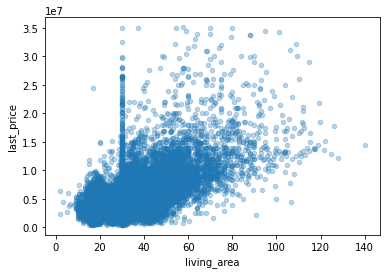

kitchen_area
0.48


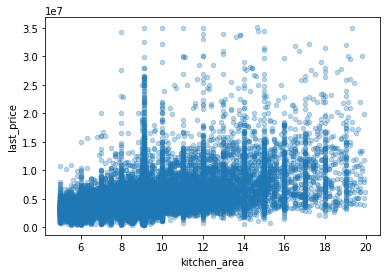

rooms
0.47


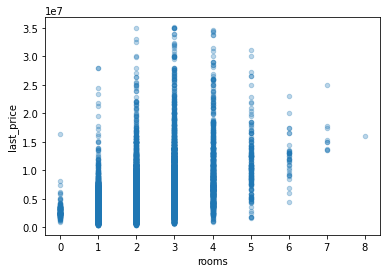

floor_type_id
0.04


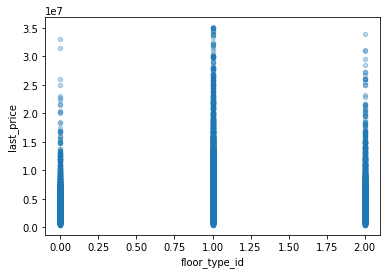

week_day
-0.01


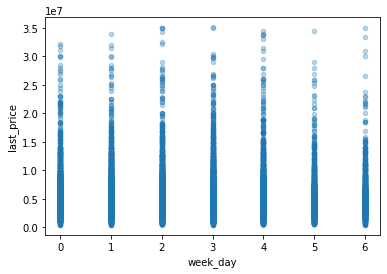

month
0.0


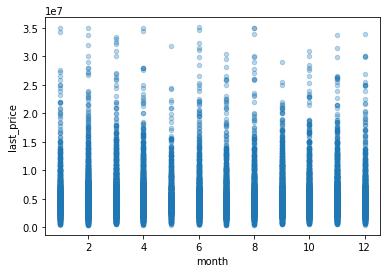

year
-0.02


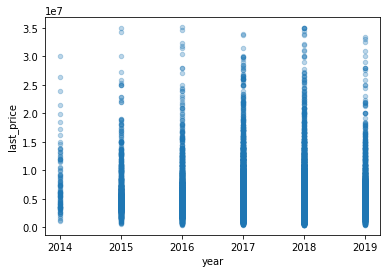

In [23]:
df['floor_type_id'] = df['floor_type'].apply(lambda x: 0 if x == 'первый' else (1 if x == 'другой' else 2))
col = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type_id', 'week_day', 'month', 'year']
print('Коэффициенты корреляции Пирсона (цены от):')

for c in col:
    print(c)
    print(round(df[c].corr(df['last_price']), 2))
    df.plot(x=c, y='last_price', kind='scatter', alpha=0.3)
    plt.show()


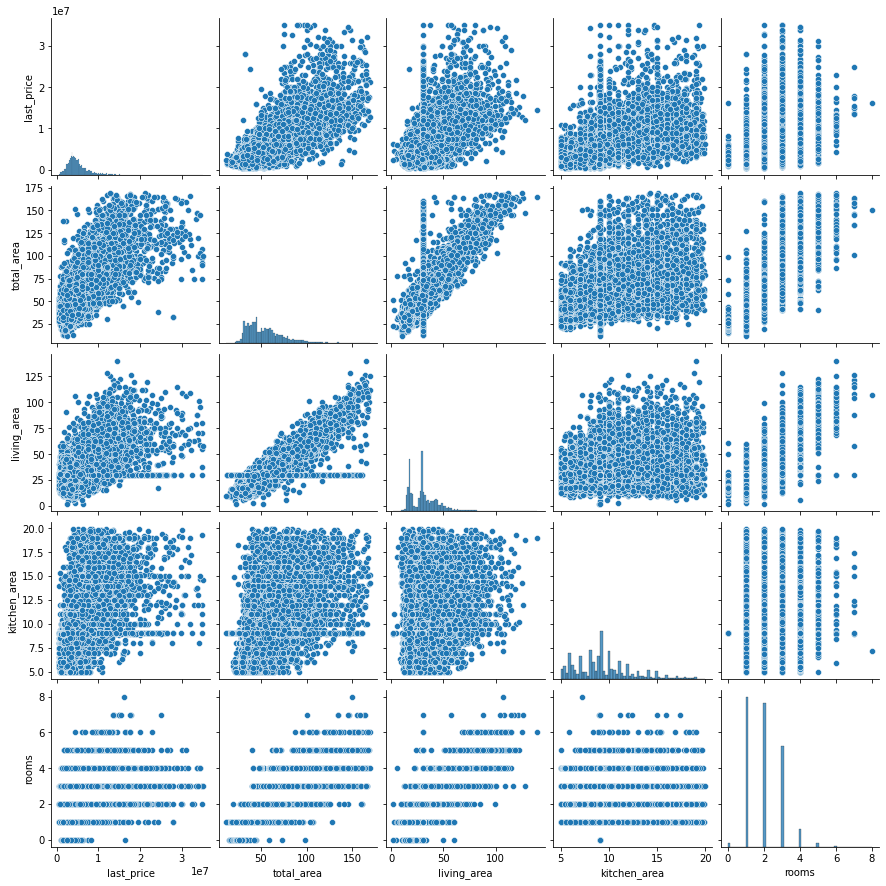

In [24]:
import seaborn as sns
sns.pairplot(df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']])

**На основании получившихся графиков и коэффициентов можно сделать вывод, что существует сильная зависимость между ценой и общей площадью (что логично). От жилой площади, площади кухни и количества комнат цена зависит средне. От типа этажа, дня недели, месяца и года цена совершенно не зависит.**

---
#### Дополнительные задания


Перейдём к следующему заданию: необходимо посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов, а также выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [25]:
city = df['locality_name'].value_counts().sort_values(ascending=False).head(10)
df_city = df.query('locality_name in @city.index')
pvt = df_city.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean', 'median'])
pvt.columns = ['_'.join(col).strip() for col in pvt.columns.values]
pvt = round(pvt, 0)
pvt.sort_values(by='mean_meter_price', ascending=False)

,count_meter_price,mean_meter_price,median_meter_price
locality_name,,,
Санкт-Петербург,14336,109478.0,103340.0
Пушкин,336,101630.0,98547.0
Кудрово,448,95582.0,95880.0
Парголово,322,90324.0,91984.0
Мурино,574,86063.0,86194.0
Шушары,433,78498.0,76667.0
Колпино,332,75370.0,74724.0
Гатчина,297,68669.0,67797.0
Всеволожск,387,68466.0,65649.0


**Как видно, самая высокая цена квадратного метра в Санкт-Петербурге. Минимальная цена - в Выборге. Также можно сделать вывод, что исходный датафрейм был преобразован корректно: значения медианы и среднего отличаются минимально.**

---

Перейдём к последнему заданию: необходимо выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Также нужно описать, как стоимость объектов зависит от расстояния до центра города.

                         count          mean     median
city_centers_nearest_km                                
0.0                         11  1.259809e+07  8000000.0
1.0                        142  1.119183e+07  9900000.0
2.0                        218  9.777610e+06  8990000.0
3.0                        272  8.928246e+06  7900000.0
4.0                        566  9.567052e+06  8452500.0
5.0                        736  9.886139e+06  8500000.0
6.0                        482  9.103804e+06  7726725.5
7.0                        335  9.006990e+06  6700000.0
8.0                        525  7.912936e+06  6800000.0
9.0                        550  6.436138e+06  5200000.0
10.0                       676  6.054808e+06  4900000.0
11.0                      1111  5.823229e+06  4950000.0
12.0                      1545  5.644598e+06  4900000.0
13.0                      1394  5.842997e+06  5150000.0
14.0                      1233  5.407892e+06  4800000.0
15.0                      1488  5.495833e+06  48

<AxesSubplot:xlabel='city_centers_nearest_km'>

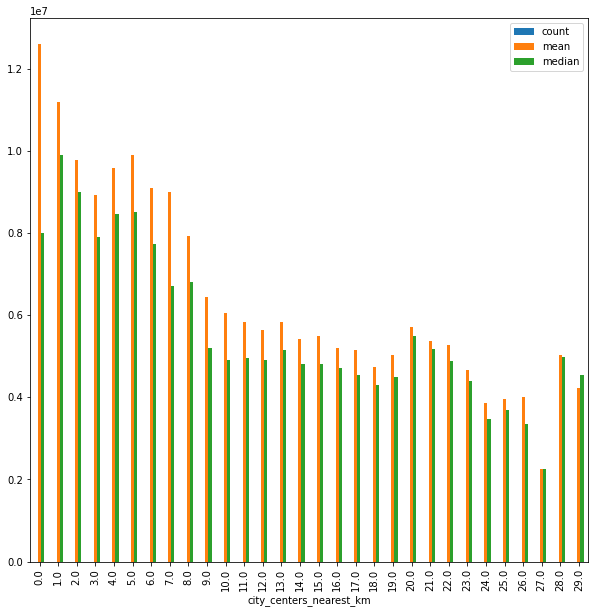

In [26]:
df_piter = df.query('locality_name == "Санкт-Петербург"').copy()
pvt_piter = (
    df_piter
    .groupby('city_centers_nearest_km')['last_price']
    .agg(['count', 'mean', 'median'])
)
print(pvt_piter)
pvt_piter.plot(kind='bar', figsize=(10, 10))



**По графику можно увидеть нисходящий тренд: чем дальше от центра, тем средняя и медианная стоимость жилья ниже.**

Выбросы можно объяснить такими факторами, как близость метро, культурных и торговых центров, наличие той или иной инфраструктуры.

Также можно заметить, что медиана "сглаживает" тренд, нивелируя выбросы сверхдорогих квартир.

Стоит обратить внимание на количество объявлений по всем аномальным явлениям в графике: там, где средняя цена не соответствует тренду, количество меньше в десятки и сотни раз. Можно сделать дополнительный вывод о недостаточной выборке по данным километрам и искажении статистических данных.

### Общий вывод

Данный проект заключается в исследовании влияния различных параметров на стоимость жилья и на стоимость квадратного метра.

Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

В ходе предобработки данных изучили пропуски. Посчитали их процент, определили природу происхождения и максимально возможно нивелировали их влияние.

В дальнейшем рекомендуется доработать булевы переменные, чтобы алгоритм самостоятельно проставлял пропуски или назначить принудительно через кнопку в форме создания объявления. Аналогичная рекомендация по балконам.

Для борьбы с неявными дубликатами рекомендуется создать жёсткий список населённых пунктов, отделить топонимы.

*В столбцах с геоданными обнаружно большое количество пропусков. Необходимо обязать пользователей указывать адрес местонахождения квартиры.

Также были добавлены новые столбцы:

* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

В ходе анализа данных была проведена работа с аномальными значениями. Были удалены позиции, которые по различным параметрам сильно искажали статистические распределения, объяснена возможная природа их происхождения.

Рекомендуется добавить в систему проверку внесённых параметров: в высотах потолков довольного много ошибок. Также можно разграничить по площади кухни и кухни-гостиные, чтобы они не влияли друг на друга разностью площадей.

При исследовании скорости продаж квартир была выведена медианная продолжительность - 91 день. Средняя продолжительность искажена выбросами долгих объявлений (самое длительное - больше 4 лет).

Проанализировано влияние различных параметров на цену квартир: существует сильная зависимость между ценой и общей площадью (что логично). От жилой площади, площади кухни и количества комнат цена зависит средне. От типа этажа, дня недели, месяца и года цена совершенно не зависит.

По ТОП-10 населённых пунктов по количеству объявлений сравнили среднюю и медианную цену квадратного метра: самая высокая цена - в Санкт-Петербурге. Минимальная цена - в Выборге. Также можно сделать вывод, что исходный датафрейм был преобразован корректно: значения медианы и среднего отличаются минимально.

Также была подтверждена зависимость медианной и средней цены от расстояния от центра города. По графику можно увидеть нисходящий тренд: чем дальше от центра, тем средняя и медианная стоимость жилья ниже.

Стоит обратить внимание на количество объявлений по всем аномальным явлениям в графике: там, где средняя цена не соответствует тренду, количество меньше в десятки и сотни раз. Можно сделать дополнительный вывод о недостаточной выборке по данным километрам и искажении статистических данных.